In [112]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [188]:
data = pd.read_csv('MovieProfanity.csv')

In [189]:
data

,Film,Genre,Year,Rated,Released,Runtime,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,A,B,D,F,S
0,A Monkey in Winter,Comedy,1962.0,NaN,31-Jan-63,105.0,NaN,7.6,2.0,tt0056636,NaN,0,0,0,0,0
1,Airplane II: The Sequel,Sci-Fi,1982.0,PG,10-Dec-82,85.0,48.0,6.2,47.0,tt0083530,NaN,1,0,7,2,4
2,Blast from the Past,Romance,1999.0,PG-13,12-Feb-99,112.0,48.0,6.6,57.0,tt0124298,NaN,3,6,12,4,6
3,"Bodies, Rest & Motion",Romance,1993.0,R,9-Apr-93,95.0,NaN,5.7,2.0,tt0106447,NaN,3,0,0,19,19
4,Boondock Saints ii: All Saints Day,Thriller,2009.0,R,11-Dec-09,118.0,24.0,6.3,60.0,tt1300851,NaN,20,7,4,115,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,The X-Files: Fight the Future,Sci-Fi,1998.0,NaN,10/13/1998,27.0,NaN,7.4,358.0,tt0365474,NaN,3,0,2,1,4
1161,Transformers: The Movie,Animation,1986.0,PG,8/8/1986,84.0,NaN,7.3,36621.0,tt0092106,NaN,0,0,2,0,0
1162,Wall-E,Animation,2008.0,G,6/27/2008,98.0,95.0,8.4,967549.0,tt0910970,223749872.0,0,0,0,0,0
1163,White Christmas,Musical,1954.0,Not Rated,11/15/1954,120.0,NaN,7.6,31174.0,tt0047673,NaN,0,0,0,0,0


In [190]:
#Normalizing based on Runtime
data['APM'] = data['A']/data['Runtime']
data['BPM'] = data['B']/data['Runtime']
data['DPM'] = data['D']/data['Runtime']
data['FPM'] = data['F']/data['Runtime']
data['SPM'] = data['S']/data['Runtime']
data['Metascore'] = data['Metascore']/10


#Swears per minute

In [191]:
data['bestScore'] = data[['Metascore','imdbRating']].max(axis = 1)

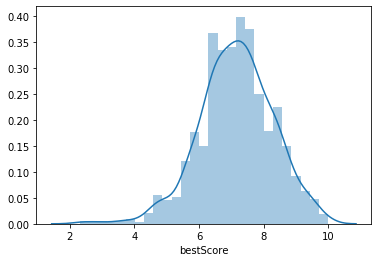

In [192]:
sns.distplot(data['bestScore'])

In [180]:
#PCA with Swears per minute and Swear Count

PPM = data[['APM','BPM','DPM','FPM','SPM']]
PCnt = data[['A','B','D','F','S']]

In [181]:
PPM = StandardScaler().fit_transform(PPM)
PCnt = StandardScaler().fit_transform(PCnt)

In [182]:
pca = PCA()
PCAPCnt = pca.fit_transform(PCnt)

In [183]:
PCAPCnt

array([[-1.52887882,  0.27783091,  0.14074548, -0.05658263, -0.01335454],
       [-0.94237225, -0.37614759, -0.43308256,  0.12752121,  0.09718927],
       [ 0.2595054 , -1.27845343,  0.49343419,  0.46861312,  0.1347252 ],
       ...,
       [-1.52887882,  0.27783091,  0.14074548, -0.05658263, -0.01335454],
       [-1.52887882,  0.27783091,  0.14074548, -0.05658263, -0.01335454],
       [-0.84483452,  0.73380392,  0.09160608,  0.71521739, -0.34154019]])

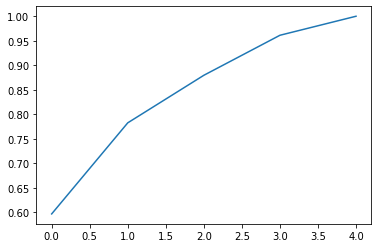

In [184]:
sns.lineplot(x = range(0,5),y = np.cumsum(pca.explained_variance_ratio_))

In [193]:
score = data[['bestScore','Genre','Year','Rated','A','B','D','F','S', 'APM','BPM','DPM','FPM','SPM']]
score = score.dropna()
score.loc[score['Rated'].isin(['NOT RATED', 'Passed', 'Unrated', 'PASSED','Approved']),'Rated'] = 'Not Rated'
score.loc[score['Rated'].isin(['TV-PG']),'Rated'] = 'PG'
score.loc[score['Rated'].isin(['TV-G']),'Rated'] = 'G'
score.loc[score['Rated'].isin(['TV-14']),'Rated'] = 'PG-13'
score.loc[score['Rated'].isin(['TV-MA','M','NC-17']),'Rated'] = 'R'

In [195]:
norm = np.linalg.norm(score['Year'])
score['Year'] = score['Year']/norm
score

,bestScore,Genre,Year,Rated,A,B,D,F,S,APM,BPM,DPM,FPM,SPM
1,6.2,Sci-Fi,0.029617,PG,1,0,7,2,4,0.011765,0.000000,0.082353,0.023529,0.047059
2,6.6,Romance,0.029871,PG-13,3,6,12,4,6,0.026786,0.053571,0.107143,0.035714,0.053571
3,5.7,Romance,0.029781,R,3,0,0,19,19,0.031579,0.000000,0.000000,0.200000,0.200000
4,6.3,Thriller,0.030021,R,20,7,4,115,55,0.169492,0.059322,0.033898,0.974576,0.466102
5,4.4,Comedy,0.029961,PG-13,2,0,0,0,10,0.024096,0.000000,0.000000,0.000000,0.120482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,6.4,Adventure,0.029871,PG-13,1,0,1,0,0,0.007812,0.000000,0.007812,0.000000,0.000000
1159,8.0,Drama,0.030006,R,19,2,4,41,23,0.174312,0.018349,0.036697,0.376147,0.211009
1161,7.3,Animation,0.029677,PG,0,0,2,0,0,0.000000,0.000000,0.023810,0.000000,0.000000
1162,9.5,Animation,0.030006,G,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [196]:
y = score['bestScore']
# X = score[['APM','BPM','DPM','FPM','SPM']] 
# X = score[['Year','A','B','D','F','S']] 
# X = score[['Year','APM','BPM','DPM','FPM','SPM']] 
# X = score[['APM','BPM','DPM','FPM','SPM','Genre']] 
# X = score[['A','B','D','F','S','Genre']] 
# X = score[['APM','BPM','DPM','FPM','SPM','Genre','Year']]
# X = score[['A','B','D','F','S','Genre','Year']] 

# X = score[['APM','BPM','DPM','FPM','SPM','Rated']] 
X = score[['Year','A','B','D','F','S','Rated']] 
# X = score[['Year','APM','BPM','DPM','FPM','SPM','Rated']] 
# X = score[['APM','BPM','DPM','FPM','SPM','Genre','Rated']] 
# X = score[['A','B','D','F','S','Genre','Rated']] 
# X = score[['APM','BPM','DPM','FPM','SPM','Genre','Year','Rated']]
# X = score[['A','B','D','F','S','Genre','Year','Rated']] 

# X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
# X = X.drop(['Genre'], axis = 1)

X = pd.concat([pd.get_dummies(X['Rated']), X], axis = 1)
X = X.drop(['Rated'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

lin = LinearRegression()

linmod = lin.fit(X_train, y_train)
linpred = linmod.predict(X_test)

mean_squared_error(y_test,linpred)

1.2534289552638596

In [197]:
columnsList = []
columnsList.append(['APM','BPM','DPM','FPM','SPM'])
columnsList.append(['Year','A','B','D','F','S'])
columnsList.append(['Year','APM','BPM','DPM','FPM','SPM'])
columnsList.append(['APM','BPM','DPM','FPM','SPM','Genre'])
columnsList.append(['A','B','D','F','S','Genre'])
columnsList.append(['APM','BPM','DPM','FPM','SPM','Genre','Year'])
columnsList.append(['A','B','D','F','S','Genre','Year'])

columnsList.append(['APM','BPM','DPM','FPM','SPM','Rated'])
columnsList.append(['Year','A','B','D','F','S','Rated'])
columnsList.append(['Year','APM','BPM','DPM','FPM','SPM','Rated'])
columnsList.append(['APM','BPM','DPM','FPM','SPM','Genre','Rated'])
columnsList.append(['A','B','D','F','S','Genre','Rated'])
columnsList.append(['APM','BPM','DPM','FPM','SPM','Genre','Year','Rated'])
columnsList.append(['A','B','D','F','S','Genre','Year','Rated'])

In [198]:
mselist = []

for c in columnsList:
    X = score[c]
    y = score['bestScore']
    if 'Genre' in c:
        X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
        X = X.drop(['Genre'], axis = 1)
    
    if 'Rated' in c:
        X = pd.concat([pd.get_dummies(X['Rated']), X], axis = 1)
        X = X.drop(['Rated'], axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)
    
    lin = LinearRegression()

    linmod = lin.fit(X_train, y_train)
    linpred = linmod.predict(X_test)

    mselist.append(mean_squared_error(y_test,linpred))

In [199]:
columnsList[mselist.index(np.min(mselist))]

['A', 'B', 'D', 'F', 'S', 'Genre', 'Year', 'Rated']

In [200]:
X = score[columnsList[mselist.index(np.min(mselist))]]
if 'Genre' in c:
    X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
    X = X.drop(['Genre'], axis = 1)

if 'Rated' in c:
    X = pd.concat([pd.get_dummies(X['Rated']), X], axis = 1)
    X = X.drop(['Rated'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

lin = LinearRegression()

linmod = lin.fit(X_train, y_train)
linpred = linmod.predict(X_test)

In [201]:
X.columns

Index(['G', 'Not Rated', 'PG', 'PG-13', 'R', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'A', 'B', 'D', 'F', 'S', 'Year'],
      dtype='object')

In [202]:
lin.intercept_

40.51396660024606

In [204]:
lin.coef_

array([ 3.94647846e-01, -1.64800385e-01,  5.10474780e-02, -2.05410923e-01,
       -7.54840167e-02, -1.54223730e-01,  2.34990620e-02,  1.49124998e-01,
       -4.00621564e-01, -2.24111141e-01,  3.32595407e-01, -5.35356544e-01,
        3.56515367e-02,  1.07314415e+00, -7.40061524e-01,  4.44689593e-01,
       -1.74583002e-01,  9.98281374e-03, -1.52455595e-01, -1.83124040e-01,
        5.81596623e-01, -8.57470482e-02, -1.84426269e-02, -1.10312457e-02,
        4.79195126e-03,  5.10765257e-03, -2.67304053e-03, -1.10824457e+03])

In [205]:
eq = []
eq.append(X.columns)
eq.append(lin.coef_)
eq = pd.DataFrame(eq)

In [206]:
eq.iloc[:,0:14]

In [207]:
eq.iloc[:,14:28]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,G,Not Rated,PG,PG-13,R,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Film-Noir
1,0.394648,-0.1648,0.0510475,-0.205411,-0.075484,-0.154224,0.0234991,0.149125,-0.400622,-0.224111,0.332595,-0.535357,0.0356515,1.07314


,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,A,B,D,F,S,Year
1,-0.740062,0.44469,-0.174583,0.00998281,-0.152456,-0.183124,0.581597,-0.085747,-0.0184426,-0.0110312,0.00479195,0.00510765,-0.00267304,-1108.24


In [159]:
norm = np.linalg.norm(X['Year'])
X['Year']/norm

1       0.029617
2       0.029871
3       0.029781
4       0.030021
5       0.029961
          ...   
1158    0.029871
1159    0.030006
1161    0.029677
1162    0.030006
1163    0.029199
Name: Year, Length: 1122, dtype: float64